<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Dimensionality-Reduction" data-toc-modified-id="Dimensionality-Reduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dimensionality Reduction</a></span><ul class="toc-item"><li><span><a href="#Main-Approaches-for-Dimensionality-Reduction" data-toc-modified-id="Main-Approaches-for-Dimensionality-Reduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Main Approaches for Dimensionality Reduction</a></span><ul class="toc-item"><li><span><a href="#Manifold-Learning" data-toc-modified-id="Manifold-Learning-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Manifold Learning</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="#Principal-Components" data-toc-modified-id="Principal-Components-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Principal Components</a></span></li><li><span><a href="#Using-Scikit-Learn" data-toc-modified-id="Using-Scikit-Learn-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Using Scikit-Learn</a></span></li><li><span><a href="#Incremental-PCA" data-toc-modified-id="Incremental-PCA-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Incremental PCA</a></span></li><li><span><a href="#Randomized-PCA" data-toc-modified-id="Randomized-PCA-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Randomized PCA</a></span></li><li><span><a href="#Kernel-PCA" data-toc-modified-id="Kernel-PCA-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Kernel PCA</a></span></li><li><span><a href="#Selecting-a-Kernel-and-Tuning-HyperParameters" data-toc-modified-id="Selecting-a-Kernel-and-Tuning-HyperParameters-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Selecting a Kernel and Tuning HyperParameters</a></span></li></ul></li><li><span><a href="#LLE-(Locally-Linear-Embedding)" data-toc-modified-id="LLE-(Locally-Linear-Embedding)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>LLE (Locally Linear Embedding)</a></span></li><li><span><a href="#Other-Dimensionality-Reduction-Techniques" data-toc-modified-id="Other-Dimensionality-Reduction-Techniques-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Other Dimensionality Reduction Techniques</a></span></li></ul></li></ul></div>

# Dimensionality Reduction

- Many ML problems involve thousands or even millions of features for each training instance.
 - This makes training extremely slow.
 - This makes much harder to find a good solution
 
This is often referred to as the **Curse of Dimensionality**.

- It is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one via **dimensionality reduction**.


NOTE:
- Reducing dimensionality does lose some information ( just like compression an image to JPEG can degrade its quality)
- Even though it will speed up training, it may also make your system perform slightly worse.
- Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization.


## Main Approaches for Dimensionality Reduction

### Manifold Learning

In [1]:
# load the dataset
import numpy  as np
np.random.seed(1457)
from sklearn.datasets import samples_generator as data
n_samples = 2000
noise = 0.05
X, _ = data.make_swiss_roll(n_samples, noise)
X.shape

(2000, 3)

In [2]:
# Compute the clustering 
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward').fit(X)

In [3]:
label = ward.labels_


In [4]:
# Visualize the swiss roll datasets
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as p3
import numpy as np

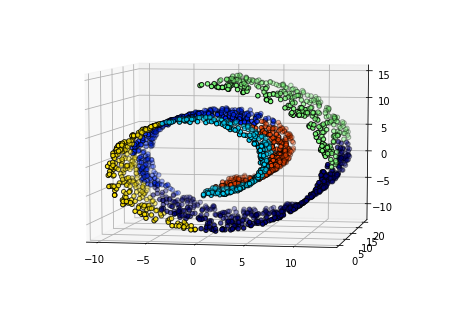

In [5]:
fig = plt.figure()
ax = p3(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(np.float(l) / np.max(label + 1)),
        s=20,
        edgecolor='k')

The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space. More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed.

## PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane.


![](https://i.imgur.com/q8t3cy9.png)

It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections. Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is the rather simple idea behind PCA.

### Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the training set. In Figure above, it is the solid line. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. In this 2D example there is no choice: it is the dotted line. If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on—as many axes as the number of dimensions in the dataset.

The unit vector that defines the ith axis is called the ith principal component (PC). In Figure above, the 1st PC is c1 and the 2nd PC is c2. In Figure 8-2 the first two PCs are represented by the orthogonal arrows in the plane, and the third PC would be orthogonal to the plane (pointing up or down).

So how can you find the principal components of a training set? Luckily, there is a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix X into the dot product of three matrices U · Σ · VT, where V contains all the principal components that we are looking for, as shown in Equation

![](https://i.imgur.com/gPOzW4M.png)

The following Python code uses NumPy’s svd() function to obtain all the principal components of the training set, then extracts the first two PCs:

In [6]:
X_centered = X - X.mean(axis=0)

In [7]:
U, s, Vt = np.linalg.svd(X_centered)
print(Vt)

[[-0.57454504  0.01334508 -0.81836416]
 [ 0.80656226 -0.16072509 -0.56888028]
 [-0.13912341 -0.98690899  0.08158017]]


In [8]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

print(c1, c2)

[-0.57454504  0.01334508 -0.81836416] [ 0.80656226 -0.16072509 -0.56888028]


NOTE:

PCA assumes that the dataset is centered around the origin. Scikit-Learn’s PCA classes take care of centering the data for you. However, if you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t forget to center the data first.

**Projection Down to d Dimensions**

Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components. Selecting this hyperplane ensures that the projection will preserve as much variance as possible.

To project the training set onto the hyperplane, you can simply compute the dot product of the training set matrix X by the matrix Wd, defined as the matrix containing the first d principal components (i.e., the matrix composed of the first d columns of V), as shown in Equation

![](https://i.imgur.com/6xIU1nr.png)

In [9]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [10]:
X2D.shape

(2000, 2)

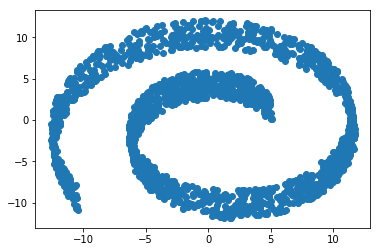

In [11]:
plt.scatter(X2D[:, 0], X2D[:, 1])

### Using Scikit-Learn

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
X2D = pca.fit_transform(X)

In [15]:
pca.components_

array([[ 0.57454504, -0.01334508,  0.81836416],
       [ 0.80656226, -0.16072509, -0.56888028]])

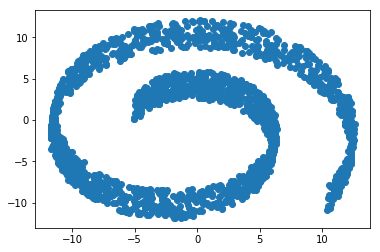

In [16]:
plt.scatter(X2D[:, 0], X2D[:, 1])

In [17]:
pca.components_.shape

(2, 3)

After fitting the PCA transformer to the dataset, you can access the principal components using the components_ variable (note that it contains the PCs as horizontal vectors, so, for example, the first principal component is equal to

In [18]:
pca.components_.T[:, 0]

array([ 0.57454504, -0.01334508,  0.81836416])

In [19]:
pca.components_.T

array([[ 0.57454504,  0.80656226],
       [-0.01334508, -0.16072509],
       [ 0.81836416, -0.56888028]])

**Explained Variance Ratio**

Another very useful piece of information is the explained variance ratio of each principal component, available via the explained_variance_ratio_ variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [20]:
pca.explained_variance_ratio_

array([ 0.39746223,  0.31515099])

**Choosing the Right Number of Dimensions**

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for data visualization—in that case you will generally want to reduce the dimensionality down to 2 or 3.

In [21]:
pca = PCA()

In [22]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [24]:
cumsum

array([ 0.39746223,  0.71261322,  1.        ])

In [25]:
d = np.argmax(cumsum >= 0.95) + 1

In [26]:
d

3

You could then set n_components=d and run PCA again. However, there is a much better option: instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [27]:
pca = PCA(n_components=0.95)

In [28]:
pca

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
X_reduced = pca.fit_transform(X)

In [30]:
X_reduced.shape

(2000, 3)

Yet another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum)

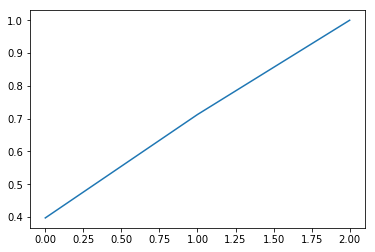

In [31]:
plt.plot(cumsum)

### Incremental PCA

One problem with the preceding implementation of PCA is that it requires the whole training set to fit in memory in order for the SVD algorithm to run. Fortunately, Incremental PCA (IPCA) algorithms have been developed: you can split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive).

In [32]:
from sklearn.decomposition import IncrementalPCA

In [33]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X)

Alternatively, you can use NumPy’s memmap class, which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it. Since the IncrementalPCA class uses only a small part of the array at any given time, the memory usage remains under control. This makes it possible to call the usual fit() method, as you can see in the following code:

```python
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)
```

### Randomized PCA

Scikit-Learn offers yet another option to perform PCA, called Randomized PCA. This is a stochastic algorithm that quickly finds an approximation of the first d principal components. Its computational complexity is O(m × d2) + O(d3), instead of O(m × n2) + O(n3), so it is dramatically faster than the previous algorithms when d is much smaller than n.

In [34]:
rnd_pca = PCA(n_components=2, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)

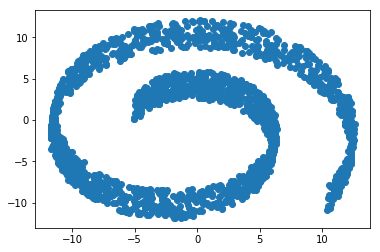

In [35]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

### Kernel PCA

A kernel is a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression with Support Vector Machines. Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space.

It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA).6 It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

In [36]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

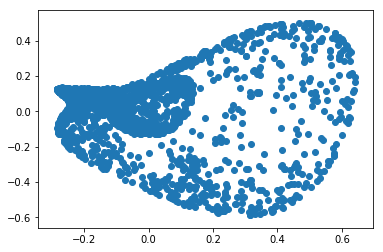

In [37]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

### Selecting a Kernel and Tuning HyperParameters

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
```

Another approach, this time entirely unsupervised, is to select the kernel and hyperparameters that yield the lowest reconstruction error. However, reconstruction is not as easy as with linear PCA.

![](https://i.imgur.com/oS8vxtN.png)
shows the original Swiss roll 3D dataset (top left), and the resulting 2D dataset after kPCA is applied using an RBF kernel (top right). Thanks to the kernel trick, this is mathematically equivalent to mapping the training set to an infinite-dimensional feature space (bottom right) using the feature map φ, then projecting the transformed training set down to 2D using linear PCA. Notice that if we could invert the linear PCA step for a given instance in the reduced space, the reconstructed point would lie in feature space, not in the original space (e.g., like the one represented by an x in the diagram). Since the feature space is infinite-dimensional, we cannot compute the reconstructed point, and therefore we cannot compute the true reconstruction error. Fortunately, it is possible to find a point in the original space that would map close to the reconstructed point. This is called the reconstruction pre-image. Once you have this pre-image, you can measure its squared distance to the original instance. You can then select the kernel and hyperparameters that minimize this reconstruction pre-image error.

**One solution is to train a supervised regression model, with the projected instances as the training set and the original instances as the targets. Scikit-Learn will do this automatically if you set fit_inverse_transform=True.**

In [38]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

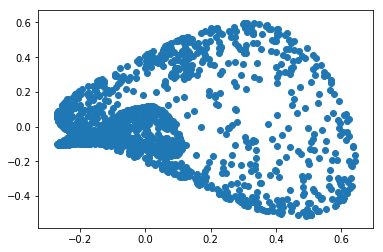

In [39]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

In [40]:
X_preimage.shape

(2000, 3)

In [41]:
import holoviews as hv
hv.extension('matplotlib')

:Scatter3D   [x,y,z]
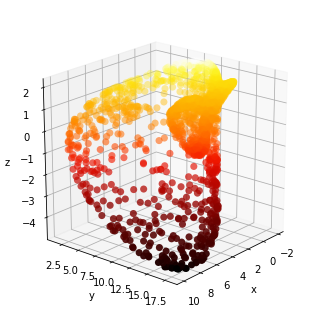

In [42]:
%%opts Scatter3D [azimuth=40 elevation=20 color_index=2] (s=50 cmap='fire')
hv.Scatter3D(X_preimage)

NOTE:

By default, fit_inverse_transform=False and KernelPCA has no inverse_transform() method. This method only gets created when you set fit_inverse_transform=True.


**You can then compute the reconstruction pre-image error:**

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(X, X_preimage)

32.975730142734086

Now you can use grid search with cross-validation to find the kernel and hyperparameters that minimize this pre-image reconstruction error.

## LLE (Locally Linear Embedding)

Locally Linear Embedding (LLE)8 is another very powerful nonlinear dimensionality reduction (NLDR) technique. It is a Manifold Learning technique that does not rely on projections like the previous algorithms. In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved (more details shortly). This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

For example, the following code uses Scikit-Learn’s LocallyLinearEmbedding class to unroll the Swiss roll. 

In [45]:
from sklearn.manifold import LocallyLinearEmbedding

In [46]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

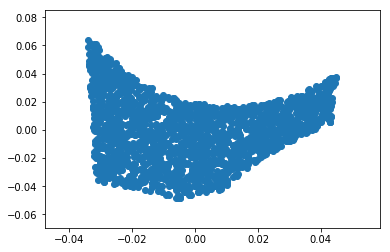

In [47]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

:Scatter   [x]   (y)
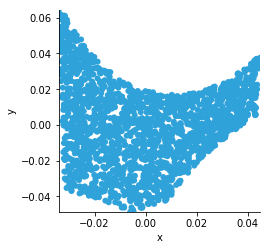

In [51]:
%%opts Scatter [color_index=2 size_index=3 scaling_factor=50]
hv.Scatter(X_reduced)

##  Other Dimensionality Reduction Techniques

There are many other dimensionality reduction techniques, several of which are available in Scikit-Learn. Here are some of the most popular:

    Multidimensional Scaling (MDS) reduces dimensionality while trying to preserve the distances between the instances (see Figure 8-13).

    Isomap creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances9 between the instances.

    t-Distributed Stochastic Neighbor Embedding (t-SNE) reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D).

    Linear Discriminant Analysis (LDA) is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.


In [53]:
%load_ext version_information
%version_information sklearn ,matplotlib, bokeh, numpy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.2.1
OS Windows 10 10.0.16299 SP0
sklearn 0.19.1
matplotlib 2.1.2
bokeh 0.12.13
numpy 1.13.3
Wed Jan 24 13:38:06 2018 Central Standard Time